In [1]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

Using TensorFlow backend.


from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

In [3]:
np.linalg.norm([[1,2,3],[4,5,6]])

9.5393920141694561

In [3]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [4]:
#OnehotLabel
import pandas as pd
y_train_df = pd.get_dummies(y_train)
y_train=np.array(pd.get_dummies(y_train))


In [5]:
##Reshaping X_train
X_train_matrix = X_train.reshape(60000,-1)
X_train_matrix.shape

(60000, 784)

In [56]:
#Model in Lecture
from keras.models import Sequential
from keras.layers import Dropout,Dense
model1 = Sequential()
model1.add(Dense(20,input_dim=x_train.shape[1],activation="relu"))
#model1.add(Dense(6,activation="relu"))
#model1.add(Dense(1,activation="relu"))
#model1.add(Dense(10,activation="relu"))
model1.add(Dense(1))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)
y_test_one_hot = np.array(pd.get_dummies(y_test))

In [12]:
from keras import optimizers
model1.compile(loss='mean_squared_error', optimizer="adam")
#model1.compile(loss="mean_squared_error",optimizer="sgd",metrics=["accuracy"])
#score_1 = model1.evaluate(x_test,y_test)
#100*score_1[1]

NameError: name 'model1' is not defined

In [59]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="./best_weight_boston.hdf5",verbose=1,
                              save_best_only=True)
hist = model1.fit(x_train,y_train,batch_size=128,epochs=100,validation_split=0.2,
                 callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 323 samples, validate on 81 samples
Epoch 1/100
128/323 [==========>...................] - ETA: 0s - loss: 4791.8574
Epoch 00001: val_loss improved from inf to 3051.34692, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 1s 2ms/step - loss: 4668.1861 - val_loss: 3051.3469
Epoch 2/100
128/323 [==========>...................] - ETA: 0s - loss: 4045.8965
Epoch 00002: val_loss improved from 3051.34692 to 2212.76758, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 147us/step - loss: 3647.7879 - val_loss: 2212.7676
Epoch 3/100
128/323 [==========>...................] - ETA: 0s - loss: 3197.0300
Epoch 00003: val_loss improved from 2212.76758 to 1598.29102, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 147us/step - loss: 2795.9917 - val_loss: 1598.2910
Epoch 4/100
128/323 [==========>...................] - ETA: 0s - loss: 1609.3440
Epoch 00004: val_loss improved from 1

323/323 [==============================] - 0s 166us/step - loss: 106.1189 - val_loss: 93.3428
Epoch 60/100
128/323 [==========>...................] - ETA: 0s - loss: 124.9605
Epoch 00060: val_loss improved from 93.34276 to 91.90302, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 151us/step - loss: 103.3511 - val_loss: 91.9030
Epoch 61/100
128/323 [==========>...................] - ETA: 0s - loss: 100.8513
Epoch 00061: val_loss improved from 91.90302 to 90.69523, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 153us/step - loss: 100.2759 - val_loss: 90.6952
Epoch 62/100
128/323 [==========>...................] - ETA: 0s - loss: 80.3053
Epoch 00062: val_loss improved from 90.69523 to 89.58968, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 192us/step - loss: 97.5928 - val_loss: 89.5897
Epoch 63/100
128/323 [==========>...................] - ETA: 0s - loss: 101.5234
Ep

323/323 [==============================] - 0s 178us/step - loss: 64.5601 - val_loss: 73.5005
Epoch 90/100
128/323 [==========>...................] - ETA: 0s - loss: 61.4104
Epoch 00090: val_loss improved from 73.50053 to 72.99984, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 152us/step - loss: 64.0103 - val_loss: 72.9998
Epoch 91/100
128/323 [==========>...................] - ETA: 0s - loss: 61.8191
Epoch 00091: val_loss improved from 72.99984 to 72.66866, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 167us/step - loss: 63.5331 - val_loss: 72.6687
Epoch 92/100
128/323 [==========>...................] - ETA: 0s - loss: 47.8043
Epoch 00092: val_loss improved from 72.66866 to 72.26913, saving model to ./best_weight_boston.hdf5
323/323 [==============================] - 0s 156us/step - loss: 63.0550 - val_loss: 72.2691
Epoch 93/100
128/323 [==========>...................] - ETA: 0s - loss: 56.5960
Epoch 00

In [8]:

score_1 = model1.evaluate(x_test,y_test)
100*score_1[1]

NameError: name 'model1' is not defined

In [9]:
92.09

92.09

In [7]:
def MSE(y, Y):
    return -np.sum(np.sum(Y*np.log(y.T)))

In [8]:
from nn import NeuralNetwork

In [10]:
%%time

import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from nn import iterations, learning_rate,hidden_nodes, output_nodes

delta = []
N_i = X_train_matrix.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(y_train_df.index, size=128)
    X, y = X_train_matrix[batch], y_train[batch]
    
    network.train(X, y)
    
    
    # Printing out the training progress
    train_loss = MSE(network.run(X_train_matrix).T, y_train)/X_train_matrix.shape[0]
    val_loss = MSE(network.run(X_test_flatten).T, y_test_one_hot)/X_test_flatten.shape[0]
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
output=network.run((X_test_flatten))

Progress: 51.0% ... Training loss: 2.425 ... Validation loss: 2.425

KeyboardInterrupt: 

In [11]:
100*(sum(np.argmax(output,axis=1) == y_test)/y_test.shape[0])

NameError: name 'output' is not defined

In [15]:
output.shape

(10000, 10)

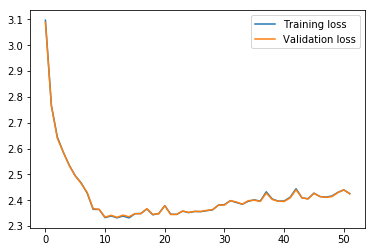

In [12]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [3]:
#print(y.shape)
import numpy as np

In [35]:
b=np.array([[1,25,45],[-78,52,61],[75,80,91],[34,32,5]])
c=np.exp(b)/np.sum(np.exp(b),axis=1,keepdims=True)
np.argma


array([[  7.78113223e-20,   2.06115362e-09,   9.99999998e-01],
       [  4.29549702e-61,   1.23394576e-04,   9.99876605e-01],
       [  1.12533283e-07,   1.67014200e-05,   9.99983186e-01],
       [  8.80797078e-01,   1.19202922e-01,   2.24045327e-13]])

In [36]:
np.argmax(c,axis=1)

array([2, 2, 2, 0])

In [32]:
 2.71828183e+00+  7.20048993e+10+   3.49342711e+19

3.49342711720049e+19

In [37]:
np.sum(np.exp(b),axis=1,keepdims=True).shape

(4, 1)

In [9]:
from learn_rate import NeuralNetwork

In [10]:
%%time

import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from learn_rate import iterations, learning_rate,hidden_nodes, output_nodes

delta = []
N_i = X_train_matrix.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(y_train_df.index, size=128)
    X, y = X_train_matrix[batch], y_train[batch]
    
    network.train(X, y)
    
    
    # Printing out the training progress
    train_loss = MSE(network.run(X_train_matrix).T, y_train)/X_train_matrix.shape[0]
    val_loss = MSE(network.run(X_test_flatten).T, y_test_one_hot)/X_test_flatten.shape[0]
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
output=network.run((X_test_flatten))

Progress: 90.0% ... Training loss: 4.657 ... Validation loss: 4.639CPU times: user 2min 57s, sys: 42 s, total: 3min 39s
Wall time: 1min 27s


In [11]:
100*(sum(np.argmax(output,axis=1) == y_test)/y_test.shape[0])

10.23

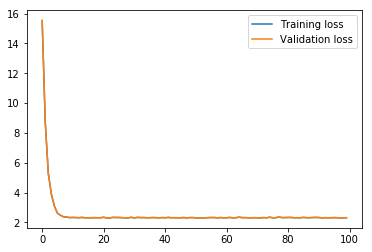

In [11]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()